In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 28.3 MB/s 
     |████████████████████████████████| 25.8 MB 1.4 MB/s 
     |████████████████████████████████| 1.3 MB 57.3 MB/s 
     |████████████████████████████████| 1.7 MB 70.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 325 kB 70.0 MB/s 
     |████████████████████████████████| 5.0 MB 65.9 MB/s 
     |████████████████████████████████| 3.3 MB 61.1 MB/s 
     |████████████████████████████████| 88 kB 8.7 MB/s 
     |████████████████████████████████| 167 kB 74.3 MB/s 
     |████████████████████████████████| 6.8 MB 67.5 MB/s 
     |████████████████████████████████| 2.0 MB 69.6 MB/s 
     |████████████████████████████████| 

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [4]:
from pycaret.regression import *

In [5]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [6]:
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2956.8294,2.107284e+07,4590.5161,0.8741,0.4704,0.4036
1,3035.7241,2.966195e+07,5446.2790,0.8275,0.4553,0.3276
2,2823.9649,2.153712e+07,4640.8100,0.7273,0.5433,0.4647
3,3087.7054,2.157234e+07,4644.6035,0.8199,0.5167,0.4908
4,3194.0246,2.828224e+07,5318.1050,0.7897,0.5338,0.4210
5,3037.1988,2.138060e+07,4623.9159,0.8625,0.3964,0.3363
6,2703.0887,2.015416e+07,4489.3381,0.8629,0.4158,0.3718
7,2780.4780,2.249121e+07,4742.4899,0.8763,0.4236,0.3069
8,2558.1031,1.854476e+07,4306.3628,0.8802,0.4612,0.4084


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
     

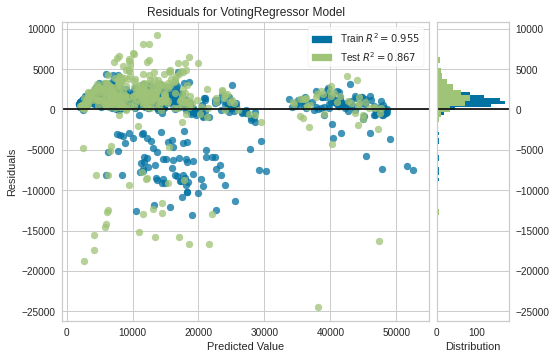

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [7]:
plot_model(blender_specific)

# Experiment 2

In [8]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('dummy', Dummify(target='charges')),
                ('fix_perfect', Remove_100(target='charges')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passt

In [9]:
s2[0]

0       16884.923828
1        1725.552246
2        4449.461914
3       21984.470703
4        3866.855225
            ...     
1333    10600.547852
1334     2205.980713
1335     1629.833496
1336     2007.944946
1337    29141.359375
Name: charges, Length: 1338, dtype: float32

In [10]:
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2785.3391,1.957891e+07,4424.8064,0.8831,0.3854,0.3057
1,3279.1618,3.150274e+07,5612.7300,0.8168,0.4339,0.3162
2,2962.5176,2.286916e+07,4782.1710,0.7104,0.5353,0.4072
3,2860.1755,1.863842e+07,4317.2240,0.8444,0.4374,0.3866
4,3106.9695,2.669469e+07,5166.6902,0.8015,0.4486,0.2938
5,3150.3240,2.374794e+07,4873.1855,0.8472,0.4105,0.2839
6,2756.7494,2.257803e+07,4751.6345,0.8464,0.3785,0.3100
7,3236.0888,2.781643e+07,5274.1279,0.8470,0.4520,0.2959
8,2912.8009,2.086377e+07,4567.6872,0.8652,0.4066,0.3264


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
     

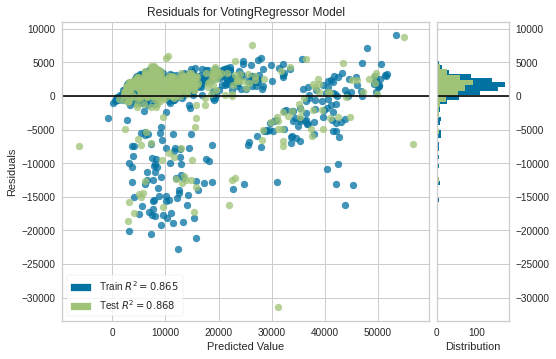

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [11]:
plot_model(blender_specific)

In [16]:
save_model(blender_specific, 'deployment_21112021')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       mi

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                     random_state=123,
                                                     solver='auto', tol=0.001)),
                                              ('lasso',
                                               Lasso(alpha=1.0, copy_X=True,
                            

In [17]:
deployment_21112021 = load_model('deployment_21112021')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=deployment_21112021, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [18]:
deployment_21112021

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                                    random_state=123,
                                                    solver='auto', tol=0.001)),
                                             ('lasso',
                                              Lasso(alpha=1.0, copy_X=True,
                                            